# <b>CS156 (Introduction to AI), Fall 2022</b>
# <u><b>Homework 2 submission</b></u>

### Roster Name: Rohan Athalye
### Student ID: 014099982
### Email address: rohan.athalye@sjsu.edu

##  <u>References and sources </u>

knn.synthetic_data.ipynb from Canvas under Files/Example Jupyter notebooks

https://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/ 

https://www.askpython.com/python/examples/k-nearest-neighbors-from-scratch

https://www.linkedin.com/pulse/k-nearest-neighbor-algorithm-from-scratchwithout-library-ritika-yadav/

##  <u>Solution</u>

#### Load libraries and set random number generator seed

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy.spatial import distance
from statistics import mode
from sklearn.metrics import accuracy_score

In [2]:
np.random.seed(42)

#### Code the solution

#### KNN Function

In [3]:
# Function to implement the k-nearest neighbors algorithm.
# newObservation is a new observation from which we want to predict a class label.
# referenceData is a reference dataset containing 1+ observations.
# k=3 means 3 neighbors should vote on the classification of the new observation.
def knn(newObservation, referenceData, k=3):
  all_euclidean_distances = []

  # Computes Euclidean distances between every observation from the reference data and the new observation, and adds them to a list.
  for i in range(len(referenceData)):
    euclidean_distance = distance.euclidean(referenceData.iloc[i], newObservation)
    all_euclidean_distances.append(euclidean_distance)

  all_euclidean_distances = np.array(all_euclidean_distances) # Converts the list of Euclidean distances to a numpy array.
  k_smallest_distances_indexes = np.argsort(all_euclidean_distances)[0:k] # Gets indexes of the k-nearest neighbors.
  return k_smallest_distances_indexes

#### Predict Labels Function

In [4]:
# Function to predict classification on test data.
# X_test is test data.
# X_train is training data.
# Y_train are labels for training data.
def predict_labels(X_test, X_train, Y_train):
  predicted_labels = []

  # Performed for every test datapoint.
  for i in range(len(X_test)):
    labels = []
    k_smallest_distances_indexes = knn(X_test.iloc[i], X_train, k=3) # Gets indexes of the k-nearest neighbors from the test datapoint.

    # Adds the labels of the k-nearest datapoints to a list.
    for i in range(len(k_smallest_distances_indexes)):
      labels.append(Y_train[k_smallest_distances_indexes[i]])

    # Gets the majority label and adds it to a list.
    majority_label = mode(labels)
    predicted_labels.append(majority_label)

  return predicted_labels

#### Generate random 2-D data

In [5]:
n = 100

# Class 0
X1 = np.random.normal(loc=-2.0, scale=2.0, size=int(n/2))
Y1 = np.random.normal(loc=0.0, scale=1.0, size=int(n/2))

# Class 1
X2 = np.random.normal(loc=2.0, scale=2.0, size=int(n/2))
Y2 = np.random.normal(loc=0.0, scale=1.0, size=int(n/2))

X = np.concatenate((X1, X2), axis=0)
Y = np.concatenate((Y1, Y2), axis=0)

#### Generate labels for 2-D data

In [6]:
# Labels 0 and 1 because there are 2 classes.
l1 = [0] * int(n/2)
l2 = [1] * int(n/2)
labels = l1 + l2

#### Create dataframe for 2-D data

In [7]:
dt = pd.DataFrame({'X':X, 'Y':Y}, columns=['X', 'Y'])

#### Split 2-D data into training and test sets

In [8]:
# X_train is training data.
# X_test is test data.
# Y_train is labels 0 and 1 for training data.
# Y_test is labels 0 and 1 for test data.
X_train, X_test, Y_train, Y_test = train_test_split(dt, labels, test_size=0.2, random_state=0)

#### Find overall accuracy rate for 2-D test data predictions

In [9]:
predicted_results = predict_labels(X_test, X_train, Y_train)
print("Accuracy of the predictions on the 2-D test dataset is " + str(accuracy_score(Y_test, predicted_results)))

Accuracy of the predictions on the 2-D test dataset is 0.9


#### Plot actual labels and predicted labels for 2-D data

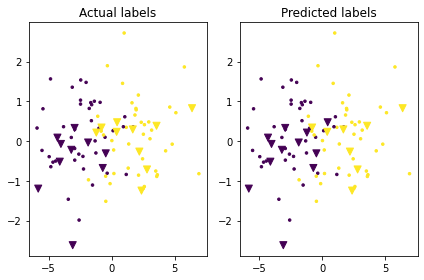

In [10]:
plt.subplot(1, 2, 1)
plt.scatter(X_train.iloc[:,0], X_train.iloc[:,1], s=25, c=Y_train, marker=".")
plt.scatter(X_test.iloc[:,0], X_test.iloc[:,1], s=50, c=Y_test, marker="v")
plt.title("Actual labels")

plt.subplot(1, 2, 2)
plt.scatter(X_train.iloc[:,0], X_train.iloc[:,1], s=25, c=Y_train, marker=".")
plt.scatter(X_test.iloc[:,0], X_test.iloc[:,1], s=50, c=predicted_results, marker="v")
plt.title("Predicted labels")

plt.tight_layout()
plt.show()

#### Generate random 3-D data

In [11]:
n = 1000

# Class 0
X1 = np.random.normal(loc=0.0, scale=3.0, size=int(n/4))
Y1 = np.random.normal(loc=-3.0, scale=1.0, size=int(n/4))
Z1 = np.random.normal(loc=-1.0, scale=1.0, size=int(n/4))

# Class 1
X2 = np.random.normal(loc=0.0, scale=3.0, size=int(n/4))
Y2 = np.random.normal(loc=1.0, scale=2.0, size=int(n/4))
Z2 = np.random.normal(loc=1.0, scale=1.0, size=int(n/4))

# Class 2
X3 = np.random.normal(loc=0.0, scale=3.0, size=int(n/4))
Y3 = np.random.normal(loc=3.0, scale=1.0, size=int(n/4))
Z3 = np.random.normal(loc=4.0, scale=1.0, size=int(n/4))

# Class 3
X4 = np.random.normal(loc=0.0, scale=3.0, size=int(n/4))
Y4 = np.random.normal(loc=5.0, scale=3.0, size=int(n/4))
Z4 = np.random.normal(loc=-3.0, scale=1.0, size=int(n/4))

X = np.concatenate((X1, X2, X3, X4), axis=0)
Y = np.concatenate((Y1, Y2, Y3, Y4), axis=0)
Z = np.concatenate((Z1, Z2, Z3, Z4), axis=0)

#### Generate labels for 3-D data

In [12]:
# Labels 0, 1, 2, and 3 because there are 4 classes.
l1 = [0] * int(n/4)
l2 = [1] * int(n/4)
l3 = [2] * int(n/4)
l4 = [3] * int(n/4)
labels = l1 + l2 + l3 + l4

#### Create dataframe for 3-D data

In [13]:
dt = pd.DataFrame({'X':X, 'Y':Y, 'Z':Z}, columns=['X', 'Y', 'Z'])

#### Split 3-D data into training and test sets

In [14]:
# X_train is training data.
# X_test is test data.
# Y_train is labels 0, 1, 2, and 3 for training data.
# Y_test is labels 0, 1, 2, and 3 for test data.
X_train, X_test, Y_train, Y_test = train_test_split(dt, labels, test_size=0.2, random_state=0)

#### Find overall accuracy rate for 3-D test data predictions

In [15]:
predicted_results = predict_labels(X_test, X_train, Y_train)
print("Accuracy of the predictions on the 3-D test dataset is " + str(accuracy_score(Y_test, predicted_results)))

Accuracy of the predictions on the 3-D test dataset is 0.915
